In [1]:
from astropy.io import fits,ascii
from astropy.table import Table,Column
import matplotlib.pyplot as plt
from numpy import *
from scipy.integrate import simpson

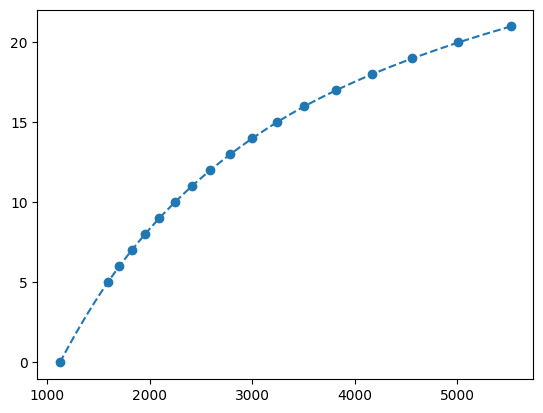

In [9]:
import matplotlib.pyplot as plt
from numpy import *
from scipy.interpolate import CubicSpline

physical=array([0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
pixel=array([1122,1589,1701,1822,1951,2091,2243,2408,2588,2784,3000,3239,3507,3816,4166,4564,5014,5526])

f=CubicSpline(pixel,physical)


plt.scatter(pixel,physical)
plt.plot(linspace(1122,5526,2000),f(linspace(1122,5526,2000)),ls='--')
# plt.yscale('log')
# plt.xscale('log')
plt.show()


Error in T from doppler parameters

In [8]:
from numpy import *
from scipy.constants import * 

bH=62000
err_bH=3000
bO=30000
err_bO=2000

err=((4/log(10))*(1/(bH**2+bO**2)**2)*((bH*err_bH)**2+(bO*err_bO)**2))**0.5
print(err)
T=8*(m_p+m_e)*(bH**2-bO**2)/(15*k)
print(log10(T))

0.05429832258138818
5.279487495655089


Composite fit from individual fits

In [ ]:
file_path='Data/VPfit_fits_rebinned/Metals_HI'

Data/sys_0,347_PG0003+158/sys_0,347_PG0003+158=loadtxt(f'{file_path}/HI_1025.txt',comments='!')
wave=data[:,0]
cont=data[:,3]

data1=loadtxt(f'{file_path}/HI_1025_1.txt',comments='!')
wave1=data1[:,0]
cont1=data1[:,3]

data2=loadtxt(f'{file_path}/HI_1025_2.txt',comments='!')
wave2=data2[:,0]
cont2=data2[:,3]

data3=loadtxt(f'{file_path}/HI_1025_3.txt',comments='!')
wave3=data3[:,0]
cont3=data3[:,3]


plt.plot(wave,cont)
plt.plot(wave1,cont1,ls='--')
plt.plot(wave2,cont2,ls='--')
plt.plot(wave3,cont3,ls='--')
plt.plot(wave,(cont1*cont2*cont3),ls='-.')

plt.show()

Velocity separation between two redshifts

In [1]:
from numpy import *
# z1=array([0.346776,0.347585,0.347912,0.347579,0.347884,0.347895,0.347923,0.347901,0.347914]) 
z1=array([0.083078,0.386036, 0.386296,0.421913]) 
z2=0.347579
# z3=array([0.346763,0.347588,0.347916,0.347586,0.347889,0.347906,0.347950,0.347923,0.347959])
# z1=0.346845
# z2=0.347579


del_v1=3e5*((1+z1)**2-(1+z2)**2)/((1+z1)**2+(1+z2)**2)
print(del_v1)
# z2=0.347586
# del_v2=3e5*((1+z3)**2-(1+z2)**2)/((1+z3)**2+(1+z2)**2)
# print(del_v2)

[-64527.13699324   8439.24042      8495.4659106   16092.58771012]


comparison of different continuum, binning

In [2]:
from numpy import *

low=loadtxt('Data/sys_0,347_PG0003+158/fit_param_binned_low.txt',dtype=str)
high=loadtxt('Data/sys_0,347_PG0003+158/fit_param_binned_high.txt',dtype=str)
mean_cont=loadtxt('Data/sys_0,347_PG0003+158/fit_param_binned_mean.txt',dtype=str)
unbinned=loadtxt('Data/sys_0,347_PG0003+158/fit_param_unbinned.txt',dtype=str)

class fits_param():

    def __init__(self,data):
        
        self.lines=data[1:,0]
        self.z=data[1:,1].astype(float)
        self.b=data[1:,3].astype(float)
        self.logN=data[1:,5].astype(float)
        self.err_z=data[1:,2].astype(float)
        self.err_b=data[1:,4].astype(float)
        self.err_logN=data[1:,6].astype(float)
        self.chi_sq=data[1:,7].astype(float)


    def plot_param(self,param,spec):

        x=linspace(1,len(self.lines),len(self.lines))

        if param=='z':
            y=self.z
            err=self.err_z
        
        elif param=='b':
            y=self.b
            err=self.err_b
        
        elif param=='logN':
            y=self.logN
            err=self.err_logN
        
        elif param=='chi_sq':
            y=self.chi_sq
            

        plt.scatter(x,y,label=spec,s=50)
        plt.plot(x,y,ls='--')
        plt.ylabel(f'{param}',labelpad=15)
        plt.xlabel('line',labelpad=15)
        plt.xticks(x,self.lines)

fits_param_low=fits_param(low)
fits_param_high=fits_param(high)
fits_param_mean=fits_param(mean_cont)

err_ml=fits_param_mean.logN-fits_param_low.logN
err_mh=fits_param_mean.logN-fits_param_high.logN

err_ml=[abs(round(x,2)) for x in err_ml]
err_mh=[abs(round(x,2)) for x in err_mh]

print(err_ml)
print(err_mh)
quit()

fits_param_unbinned=fits_param(unbinned)

plt.figure()

fits_param_mean.plot_param('chi_sq','rebinned')
# fits_param_low.plot_param('z','lower continuum')
# fits_param_high.plot_param('z','upper continuum')
fits_param_unbinned.plot_param('chi_sq','oversampled')
plt.title(r'${\chi}^{2}$ values for rebinned and oversampled spectrum')

plt.legend()
plt.show()

[0.07, 0.04, 0.03, 0.03, 0.0, 0.05, 0.0, 0.16, 0.02]
[0.07, 0.03, 0.03, 0.02, 0.01, 0.19, 0.0, 0.09, 0.01]


NameError: name 'plt' is not defined

: 

'bin v/s unbinned spectrum plot'

In [ ]:
file='PG0003+158_rebinned.fits'

data_a=loadtxt('Data/spec_PG0003+158_v3.dat')

wave_a=data_a['WAVE']
flux_a=data_a['FLUX']

hdu_org=fits.open('Data/PG0003+158.fits')
data_org=Table(hdu_org[1].data)

wave_org=data_org['WAVE'][data_org['WAVE']>=1132.7]
flux_org=data_org['FLUX'][data_org['WAVE']>=1132.7]


hdu=fits.open(f'Data/{file}')
data=Table(hdu[1].data)

wave=data['WAVE']
flux=data['FLUX']
cont=data['CONT_FLUX']
err=data['ERROR']


plt.step(wave_org,flux_org,label='Unbinned spectrum')
plt.step(wave,flux,label='My rebinned spectrum')
plt.step(wave_a,flux_a,label='Your rebinned spectrum')
# plt.plot(wave,cont,label='mean')
# plt.plot(wave,cont*0.97,label='lower',ls='--')
# plt.plot(wave,cont*1.03,label='upper',ls='--')
plt.ylabel('Flux')
plt.xlabel('Wavelength')
plt.legend()
plt.show()

'equivalent width'

In [ ]:
hdu_unbin=fits.open('Data/PG0003+158_unbinned.fits')
hdu_bin=fits.open('Data/PG0003+158_rebinned.fits')

class Spectrum():

    def __init__(self,hdu):

        data=Table(hdu[1].data)

        self.wave=data['WAVE']
        self.flux=data['FLUX']
        self.cont=data['CONT_FLUX']
        self.err=data['ERROR']
    
    def eqw(self,ions):
        
        cont=self.cont
        wave=self.wave
        flux=self.flux

        eq_w=[]

        for i in ions:

            wave_slice=[]
            flux_slice=[]
            cont_slice=[]

            for j in range(len(wave)):
                if ions[i][0] <= wave[j] <= ions[i][1]:
                    wave_slice.append(wave[j])
                    flux_slice.append(flux[j])
                    cont_slice.append(cont[j])

            integral=simpson(flux_slice,wave_slice)
            w=(ions[i][1]-ions[i][0])-(integral/mean(cont_slice))

            eq_w.append(w)

        return eq_w



ions={'Ha':[1636.55,1639.225],'Hb':[1381.1,1383.264],'OVI_1031':[1389.856,1391.254],'OVI_1037':[1397.816,1398.877],'CII':[1396.727,1396.995],'CIII':[1310.485,1311.182],'SiII':[1698.778,1699.039],'SiIII':[1626.068,1626.403]}


spec_unbin=Spectrum(hdu_unbin)
spec_bin=Spectrum(hdu_bin)

plt.step(spec_bin.wave,spec_bin.flux)
plt.show()

eq_w_unbin=array(spec_unbin.eqw(ions))
eq_w_bin=array(spec_bin.eqw(ions))

diff=eq_w_bin-eq_w_unbin

x=linspace(1,len(ions),len(ions))

plt.plot(x,eq_w_unbin,ls='--')
plt.plot(x,eq_w_bin,ls='--')
plt.scatter(x,eq_w_unbin,label='unbinned')
plt.scatter(x,eq_w_bin,label='rebinned')
plt.xticks(x,ions.keys())
plt.xlabel('Lines',labelpad=15)
plt.ylabel('Equivalent Width',labelpad=15)
plt.legend()
plt.show()

plt.step(spec_unbin.wave,spec_unbin.flux)
plt.plot(spec_unbin.wave,spec_unbin.cont)
plt.show()

'Velocity separation of components'

In [ ]:
data=loadtxt('wavelengths_fit.txt',dtype=str)
data_rest=loadtxt('Data/rest_wave.txt',dtype=str)

ion=data_rest[:,1]
wave_rest=data_rest[:,0].astype(float)

rest_wave={}

for i in range(len(ion)):
    rest_wave.update({ion[i]:wave_rest[i]})

line=data[1:,0]
wave=data[1:,1].astype(float)
v=[]

z_abs=(wave[3]-rest_wave['OVI_1031'])/rest_wave['OVI_1031']

for i in range(len(line)):

    cen_wave_obs=(1+z_abs)*rest_wave[line[i]]
    a=((wave[i]**2-(cen_wave_obs**2))/(wave[i]**2+(cen_wave_obs**2)))
    v.append(3e5*(a))

print(line)
print(v)

'temperature using 0 VI and HI'

In [1]:
# bHI=62.49162
# bOVI=29.63435

# T=(16/(15*(0.129**2)))*(bHI**2-(bOVI**2))

from numpy import log10

bHI=[62.49,2.92]
bOVI=[29.63,2.04]

T=(16/(15*(0.129**2)))*(bHI[0]**2-(bOVI[0]**2))
T_low=(16/(15*(0.129**2)))*((bHI[0]-bHI[1])**2-((bOVI[0]+bOVI[1])**2))
T_high=(16/(15*(0.129**2)))*((bHI[0]+bHI[1])**2-((bOVI[0]-bOVI[1])**2))

print(log10(T),T)
print(log10(T_low),T_low)
print(log10(T_high),T_high)


5.287870791392982 194030.85231256136
5.212638782879954 163169.4249143681
5.3530537760647015 225451.8358271738


In [1]:
v_abs=3e5*(((1+0.347579)**2-1)/((1+0.347579)**2+1))
v_2=3e5*(((1+0.3479)**2-1)/((1+0.3479)**2+1))

print(v_abs-v_2)


-65.4490012654278


In [5]:
from numpy import *

data=loadtxt('Data/rest_wave.txt',dtype=str)

wave=data[:,0].astype(float)
ion=data[:,1]

mask=logical_and(wave>=840,wave<=1333)



[1242.804  1238.821  1037.616  1031.927   977.02    918.1294  919.3514
  920.9631  923.1504  926.2257  930.7483  937.8035  949.7431  972.5368
 1025.7223 1215.6701 1036.3367 1036.3367  977.0201 1190.4158 1193.2897
 1260.4221 1206.5   ]
['NVB' 'NVA' 'OVI_1038' 'OVI_1032' 'CIII_977' 'HI_918' 'HI_919' 'HI_920'
 'HI_923' 'HI_926' 'HI_930' 'HI_937' 'HI_949' 'HI_972' 'HI_1025' 'HI_1215'
 'CII_1036' 'CII_1036' 'CIII_977' 'SiII_1190' 'SiII_1193' 'SiII_1260'
 'SiIII_1206']


In [2]:
from numpy import log10

class line():

    def __init__(self,m,b_val):
        
        self.b=b_val
        self.m=m

    def temp(self):

        T=(self.m/(self.m-1))*(16.2**2-((self.b)**2))*(1/0.129**2)

        print(f'T = {T}  logT = {log10(T)}')

b_CII=line(12,3.1)
b_CIII=line(12,22.6)
b_SiII=line(28,3.2)
b_SiIII=line(28,9.7)

b_CII.temp()
b_CIII.temp()
b_SiII.temp()
b_SiIII.temp()

T = 16574.39729911336  logT = 4.21943774495444
T = -16278.741989937233  logT = nan
T = 15716.64808249148  logT = 4.1963599288217965
T = 10491.267663312614  logT = 4.020827967308842


/tmp/ipykernel_331/2317725232.py:14: RuntimeWarning: invalid value encountered in log10
  print(f'T = {T}  logT = {log10(T)}')


In [2]:
from numpy import *

param=loadtxt('../VPfit/3c263/z=0.140756/fit_params.txt',dtype=str)


line=param[:,0]
z=param[:,1].astype(float)
z_err=param[:,2].astype(float)

v_z=lambda z : 3e5*(((1+z)**2-1)/((1+z)**2+1))
del_vz=lambda z,z_err: 4*3e5*((1+z)/(((1+z)**2)+1)**2)*z_err

z_abs=0.14072

v_abs=v_z(z_abs)

for i in range(len(line)):
    print(f'{line[i]}   {v_z(z[i])-v_abs:.2f}    {del_vz(z[i],z_err[i]):.2f} ')


SiIII   -8.27    8.17 
CIV   5.72    3.65 
HI*   67978.70    9.49 
HI*   68040.43    7.32 
OVI   9.42    2.40 
HI   -4.67    0.57 
HI   8.96    0.45 
